In [45]:
import numpy as np
import pandas as pd
from datetime import datetime
import utils
#def generate_random_sales(min_val, max_val, size):
   # return np.random.randint(min_val, max_val, size)


dates = []
for month in range(1, 13):   # mois 1 à 12
    dates.append(datetime(2025, month, 1))

# Générer les ventes
product_A = generate_random_sales(50, 100, 12)
product_B = generate_random_sales(30, 80, 12)
product_C = generate_random_sales(20, 60, 12)
product_D = generate_random_sales(10, 50, 12)

# Créer le DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Product_D': product_D
})

# Sauvegarder
df.to_csv('data/initial.csv', index=False)

print(df)

         Date  Product_A  Product_B  Product_C  Product_D
0  2025-01-01         72         59         26         20
1  2025-02-01         56         69         50         44
2  2025-03-01         69         58         27         21
3  2025-04-01         70         40         26         17
4  2025-05-01         52         38         34         36
5  2025-06-01         77         32         29         38
6  2025-07-01         58         63         53         25
7  2025-08-01         90         45         25         34
8  2025-09-01         73         55         48         20
9  2025-10-01         91         70         42         22
10 2025-11-01         77         61         59         19
11 2025-12-01         80         33         35         15


In [7]:
import pandas as pd
import numpy as np

# === ÉTAPE 2: Build DataFrame ===
df = pd.DataFrame({
    'Month': dates,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Product_D': product_D
})

# Métriques
df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)
df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)
df['Month_over_Month_Growth'] = ((df['Total_Sales'] - df['Total_Sales'].shift(1)) / df['Total_Sales'].shift(1)) * 100

# Trimestres
df['Quarter'] = df['Month'].dt.month.map({
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
})

# Max/Min produits
df['Max_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmax(axis=1)
df['Min_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmin(axis=1)

df.to_csv('data/final.csv', index=False)
print(df)

        Month  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0  2025-01-01         95         52         22         41          210   
1  2025-02-01         89         60         44         47          240   
2  2025-03-01         69         79         56         32          236   
3  2025-04-01         88         63         47         41          239   
4  2025-05-01         89         41         20         15          165   
5  2025-06-01         88         50         42         31          211   
6  2025-07-01         50         50         49         26          175   
7  2025-08-01         77         51         45         10          183   
8  2025-09-01         52         72         29         26          179   
9  2025-10-01         73         69         23         47          212   
10 2025-11-01         96         53         39         27          215   
11 2025-12-01         62         36         46         34          178   

    Average_Sales  Month_over_Month_G

In [19]:
import pandas as pd
import numpy as np
# Moyenne des ventes de chaque produit par trimestre
pivot_avg = df.pivot_table(
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
    index='Quarter',
    aggfunc='mean'
)

print("Moyenne des ventes par trimestre:")
print(pivot_avg)
df.to_csv('data/output.csv', index=False)


Moyenne des ventes par trimestre:
         Product_A  Product_B  Product_C  Product_D
Quarter                                            
Q1       84.333333  63.666667  40.666667  40.000000
Q2       88.333333  51.333333  36.333333  29.000000
Q3       59.666667  57.666667  41.000000  20.666667
Q4       77.000000  52.666667  36.000000  36.000000


In [20]:
import pandas as pd
import numpy as np
# Moyenne des ventes de chaque produit par trimestre
pivot_total = df.pivot_table(
    values=['Total_Sales'],
    index='Quarter',
    aggfunc='sum'
)

print("Somme des ventes par trimestre:")
print(pivot_total)

df.to_csv('data/output.csv', index=False)

Somme des ventes par trimestre:
         Total_Sales
Quarter             
Q1               686
Q2               615
Q3               537
Q4               605


In [21]:
import pandas as pd
import numpy as np
total_sales_per_quarter = df.groupby('Quarter')['Total_Sales'].sum().reset_index()
print("Somme des ventes par trimestre:")
print(total_sales_per_quarter)
df.to_csv('data/output.csv', index=False)

Somme des ventes par trimestre:
  Quarter  Total_Sales
0      Q1          686
1      Q2          615
2      Q3          537
3      Q4          605


In [36]:
import pandas as pd
import numpy as np

# 1. Moyenne des produits par trimestre
pivot_avg = df.pivot_table(
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
    index='Quarter',
    aggfunc='mean'
).reset_index()

# 2. Somme de Total_Sales par trimestre avec pivot
pivot_total = df.pivot_table(
    values=['Total_Sales'],
    index='Quarter',
    aggfunc='sum'
).reset_index()

# 3. Somme de Total_Sales par trimestre avec groupby
group_total = df.groupby('Quarter')['Total_Sales'].sum().reset_index()
group_total.rename(columns={'Total_Sales': 'Total_Sales_GroupBy'}, inplace=True)

# 4. Fusionner tout في DataFrame واحد
final_df = pivot_avg.merge(pivot_total, on='Quarter', how='left')

final_df = final_df.merge(group_total, on='Quarter', how='left')
final_df.set_index('Quarter', inplace=True)

# 5. حفظ الملف مرة واحدة فقط
final_df.to_csv('data/output.csv', index=False)


print(final_df)


         Product_A  Product_B  Product_C  Product_D  Total_Sales  \
Quarter                                                            
Q1       84.333333  63.666667  40.666667  40.000000          0.0   
Q2       88.333333  51.333333  36.333333  29.000000          0.0   
Q3       59.666667  57.666667  41.000000  20.666667          0.0   
Q4       77.000000  52.666667  36.000000  36.000000          0.0   

         Total_Sales_GroupBy  
Quarter                       
Q1                       0.0  
Q2                       0.0  
Q3                       0.0  
Q4                       0.0  


In [23]:
best_month = df.loc[df['Total_Sales'].idxmax(), 'Month']
best_month_sales = df['Total_Sales'].max()

print(f"Meilleur mois : {best_month} avec {best_month_sales} ventes")

Meilleur mois : 2025-02-01 00:00:00 avec 240 ventes


In [28]:
total_per_product = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum()
best_product = total_per_product.idxmax()
best_product_sales = total_per_product.max()

print(f"Meilleur produit : {best_product} avec {best_product_sales} ventes")

Meilleur produit : Product_A avec 928 ventes


In [37]:
best_quarter = final_df['Total_Sales_GroupBy'].idxmax()
best_querter_values = final_df['Total_Sales_GroupBy'].max()
print(f"Meilleur semestre : {best_quarter} avec {best_querter_values} ventes")

Meilleur semestre : Q1 avec 0.0 ventes


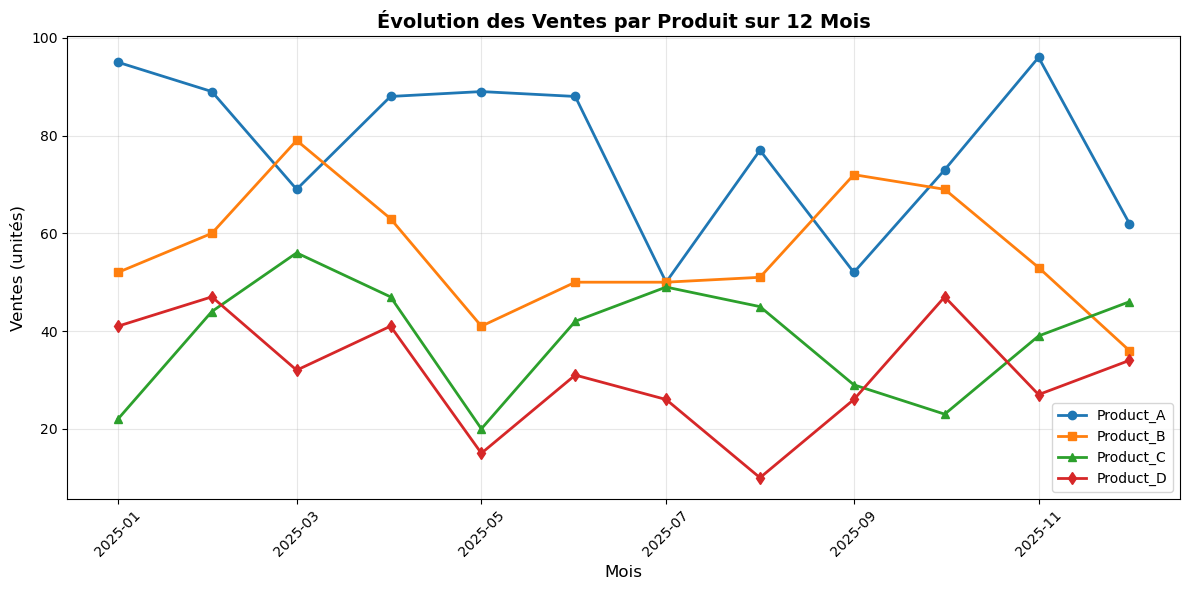

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
plt.figure(figsize=(12, 6))

# Tracer une ligne pour chaque produit
plt.plot(df['Month'], df['Product_A'], marker='o', label='Product_A', linewidth=2)
plt.plot(df['Month'], df['Product_B'], marker='s', label='Product_B', linewidth=2)
plt.plot(df['Month'], df['Product_C'], marker='^', label='Product_C', linewidth=2)
plt.plot(df['Month'], df['Product_D'], marker='d', label='Product_D', linewidth=2)

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes (unités)', fontsize=12)
plt.title('Évolution des Ventes par Produit sur 12 Mois', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

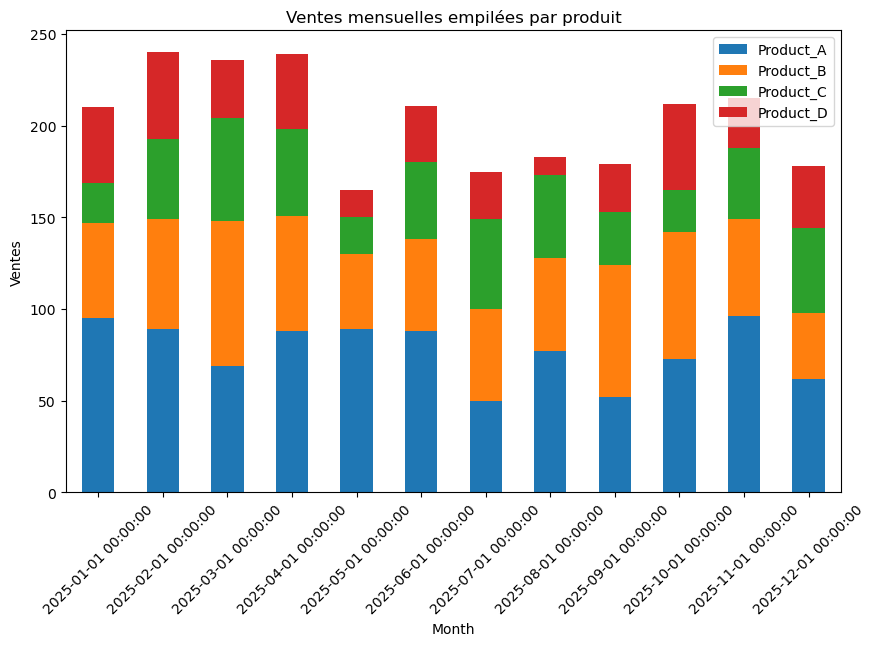

In [41]:
df_plot = df.set_index('Month')[['Product_A', 'Product_B', 'Product_C', 'Product_D']]

df_plot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Ventes mensuelles empilées par produit')
plt.ylabel('Ventes')
plt.xticks(rotation=45)

# Annoter le meilleur mois
best_month_idx = df['Month'].tolist().index(best_month)
plt.text(best_month_idx, df['Total_Sales'].max()+5, 'Meilleur Mois', ha='center', color='red')

plt.show()

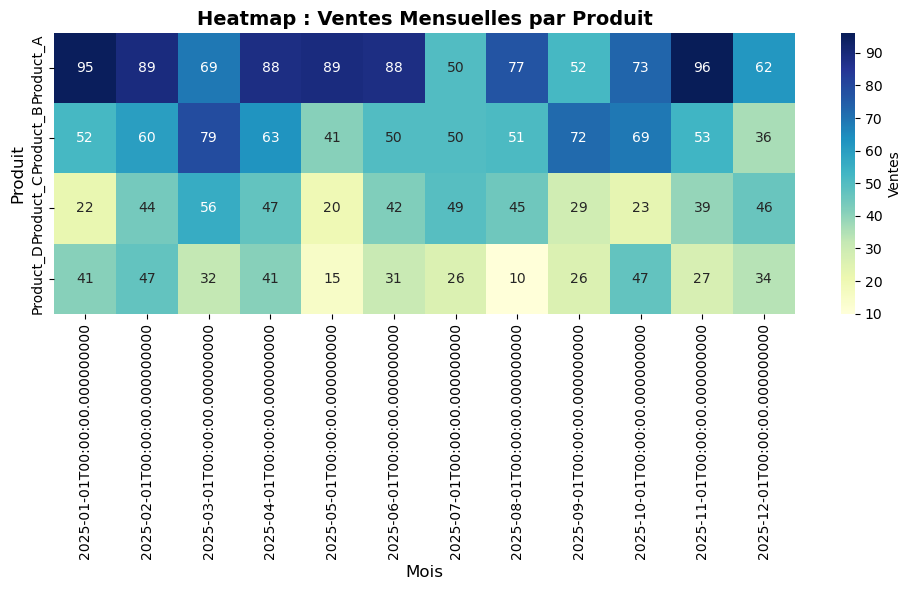

In [42]:
# Créer une matrice pour la heatmap
heatmap_data = df[['Month', 'Product_A', 'Product_B', 'Product_C', 'Product_D']].set_index('Month')

# Créer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Ventes'})
plt.title('Heatmap : Ventes Mensuelles par Produit', fontsize=14, fontweight='bold')
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Produit', fontsize=12)
plt.tight_layout()
plt.show()

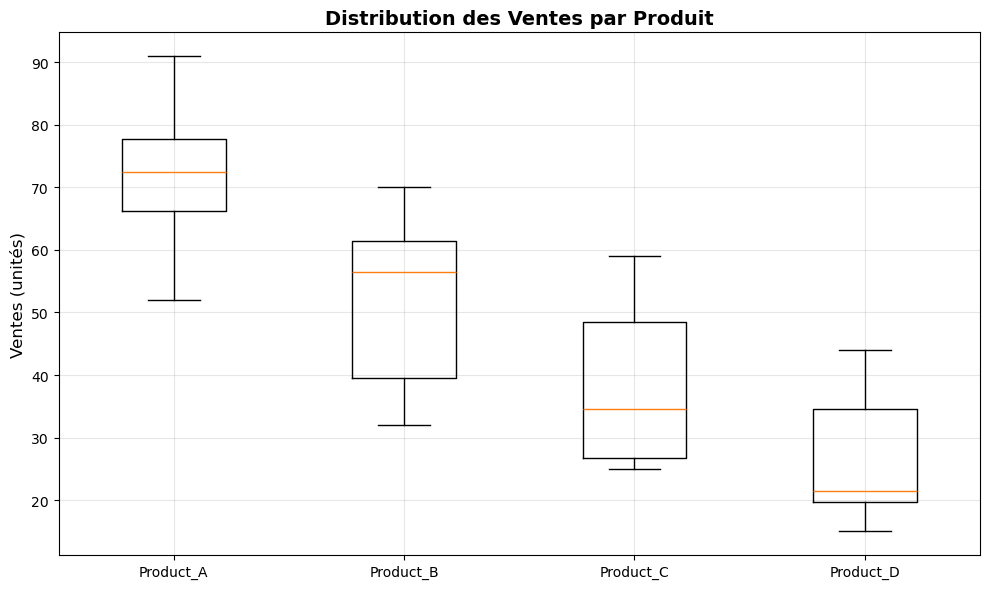

In [47]:
# Boxplot pour voir la distribution
fig, ax = plt.subplots(figsize=(10, 6))

products_data = [df['Product_A'], df['Product_B'], df['Product_C'], df['Product_D']]
ax.boxplot(products_data, tick_labels=['Product_A', 'Product_B', 'Product_C', 'Product_D'])

ax.set_ylabel('Ventes (unités)', fontsize=12)
ax.set_title('Distribution des Ventes par Produit', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()